In [1]:
import pandas as pd
import html

In [2]:
organes = pd.read_csv('out/organes.csv')

In [3]:
amendements = (
    pd
    .read_csv('out/amendements.csv')
    .query('organe.str.startswith("PO")')
    .join(
        organes.set_index('uid'),
        on='organe'
    )
)

amendements

,id,texte,signataire,organe,dispositif,@xmlns,@xmlns:xsi,@xsi:type,codeType,libelle,...,regime,legislature,secretariat,listePays,regimeJuridique,siteInternet,nombreReunionsAnnuelles,positionPolitique,preseance,couleurAssociee
0,AMANR5L16PO419604B0659P0D1N000007,PIONANR5L16B0659,PA720822,PO800520,NaN,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Rassemblement National,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,2.0,#35495E
1,AMANR5L16PO419604B0659P0D1N000011,PIONANR5L16B0659,PA721328,PO800538,"<p style=""text-align: justify;"">R&#233;diger a...",http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Renaissance,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Majoritaire,1.0,#61468F
2,AMANR5L16PO419604B0659P0D1N000010,PIONANR5L16B0659,PA794154,PO800526,"<p style=""text-align: justify;"">Apr&#232;s le ...",http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Écologiste - NUPES,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,8.0,#77AA79
3,AMANR5L16PO419604B0659P0D1N000006,PIONANR5L16B0659,PA794670,PO800520,"<p style=""text-align: justify;"">Substituer aux...",http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Rassemblement National,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,2.0,#35495E
4,AMANR5L16PO419604B0659P0D1N000001,PIONANR5L16B0659,PA795084,PO800490,NaN,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,La France insoumise - Nouvelle Union Populaire...,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,3.0,#E42313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78801,AMANR5L16PO791932BTC0617P0D1N000053,PIONANR5L16BTC0617,PA642868,PO800514,NaN,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Horizons et apparentés,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Minoritaire,7.0,#32B3CA
78802,AMANR5L16PO791932BTC0617P0D1N000116,PIONANR5L16BTC0617,PA720696,PO800532,NaN,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,"Libertés, Indépendants, Outre-mer et Territoires",...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,10.0,#F8D434
78803,AMANR5L16PO791932BTC0617P0D1N000012,PIONANR5L16BTC0617,PA795076,PO800526,"<p style=""text-align: justify;"">I.&#160;&#8211...",http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Écologiste - NUPES,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,8.0,#77AA79
78804,AMANR5L16PO791932BTC0617P0D1N000045,PIONANR5L16BTC0617,PA793688,PO800490,"<p style=""text-align: justify;"">Le Gouvernemen...",http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,La France insoumise - Nouvelle Union Populaire...,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,3.0,#E42313


In [4]:
(
    amendements
    .dropna(subset="dispositif")
    .assign(
        dispositif_txt = lambda df: df.dispositif.str.replace(r'<[^<>]*>', '', regex=True).apply(html.unescape)
    )
    .pipe(lambda df: (
        df
        [df.duplicated(subset=['texte', 'dispositif_txt'], keep=False)]
    ))
)

,id,texte,signataire,organe,dispositif,@xmlns,@xmlns:xsi,@xsi:type,codeType,libelle,...,legislature,secretariat,listePays,regimeJuridique,siteInternet,nombreReunionsAnnuelles,positionPolitique,preseance,couleurAssociee,dispositif_txt
1,AMANR5L16PO419604B0659P0D1N000011,PIONANR5L16B0659,PA721328,PO800538,"<p style=""text-align: justify;"">R&#233;diger a...",http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Renaissance,...,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Majoritaire,1.0,#61468F,Rédiger ainsi l’alinéa 2 :« Art. L. 822‑1‑1. –...
5,AMANR5L16PO419604B0659P0D1N000017,PIONANR5L16B0659,PA719640,PO800484,"<p style=""text-align: justify;"">R&#233;diger a...",http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Démocrate (MoDem et Indépendants),...,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Minoritaire,5.0,#CE5215,Rédiger ainsi l’alinéa 2 :« Art. L. 822‑1‑1. –...
14,AMANR5L16PO419604B0659P0D1N000018,PIONANR5L16B0659,PA719640,PO800484,"<p style=""text-align: justify;"">Apr&#232;s les...",http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Démocrate (MoDem et Indépendants),...,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Minoritaire,5.0,#CE5215,Après les mots :« visant à »rédiger ainsi la f...
16,AMANR5L16PO419604B0659P0D1N000014,PIONANR5L16B0659,PA794426,PO800514,"<p style=""text-align: justify;"">Apr&#232;s les...",http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Horizons et apparentés,...,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Minoritaire,7.0,#32B3CA,Après les mots :« visant à »rédiger ainsi la f...
19,AMANR5L16PO419604B0659P0D1N000013,PIONANR5L16B0659,PA794426,PO800514,"<p style=""text-align: justify;"">R&#233;diger a...",http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Horizons et apparentés,...,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Minoritaire,7.0,#32B3CA,Rédiger ainsi l’alinéa 2 :« Art. L. 822‑1‑1. –...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78783,AMANR5L16PO791932BTC0617P0D1N000091,PIONANR5L16BTC0617,PA720696,PO800532,"<p style=""text-align: justify;"">&#192; la seco...",http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,"Libertés, Indépendants, Outre-mer et Territoires",...,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,10.0,#F8D434,"À la seconde phrase de l’alinéa 13, supprimer ..."
78784,AMANR5L16PO791932BTC0617P0D1N000087,PIONANR5L16BTC0617,PA720696,PO800532,"<p style=""text-align: justify;"">Au d&#233;but ...",http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,"Libertés, Indépendants, Outre-mer et Territoires",...,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,10.0,#F8D434,"Au début de l’alinéa 4, ajouter les mots :« Ai..."
78799,AMANR5L16PO791932BTC0617P0D1N000069,PIONANR5L16BTC0617,PA795076,PO800526,"<p style=""text-align: justify;"">R&#233;diger a...",http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Écologiste - NUPES,...,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,8.0,#77AA79,Rédiger ainsi cet article :« Après le chapitre...
78800,AMANR5L16PO791932BTC0617P0D1N000090,PIONANR5L16BTC0617,PA720696,PO800532,"<p style=""text-align: justify;"">R&#233;diger a...",http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,"Libertés, Indépendants, Outre-mer et Territoires",...,1

In [5]:
identiques = (
    amendements
    .dropna(subset="dispositif")
    .assign(
        dispositif_txt = lambda df: df.dispositif.str.replace(r'<[^<>]*>', '', regex=True).apply(html.unescape)
    )
    .pipe(lambda df: (
        df
        [df.duplicated(subset=['texte', 'dispositif_txt'], keep=False)]
    ))
    .assign(dummy=True)
    .pivot_table(
        index=['texte', 'dispositif_txt'],
        columns='libelle',
        values = 'dummy',
        #aggfunc='sum'
    )
    .fillna(0)
    .pipe(lambda df: df[ df.sum(axis=1) > 1 ])
)

identiques

libelle                                                                Démocrate (MoDem et Indépendants)  \
texte              dispositif_txt                                                                          
PIONANR5L16B0134   L’article L. 425‑5 du code de l’environnement e...                                0.0   
                   Supprimer cet article.                                                            0.0   
                   Supprimer les deux dernières phrases de l’aliné...                                0.0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...                                0.0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...                                0.0   
...                                                                                                  ...   
PRJLANR5L16BTC1234 À l’alinéa 64, substituer au mot : « quinze »le...                                0.0   
                   À l’alinéa 7, après le mot : « assure »,insérer...                                0.0   
                   À la deuxième phrase de l’alinéa 71, après le m...                                0.0   
                   À la fin de la première phrase, substituer à l’...                                1.0   
                   À l’avant-dernière phrase de l’article 45, subs...                                1.0   

libelle                                                                Gauche démocrate et républicaine - NUPES  \
texte              dispositif_txt                                                                                 
PIONANR5L16B0134   L’article L. 425‑5 du code de l’environnement e...                                       0.0   
                   Supprimer cet article.                                                                   0.0   
                   Supprimer les deux dernières phrases de l’aliné...                                       0.0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...                                       0.0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...                                       0.0   
...                                                                                                         ...   
PRJLANR5L16BTC1234 À l’alinéa 64, substituer au mot : « quinze »le...                                       0.0   
                   À l’alinéa 7, après le mot : « assure »,insérer...                                       0.0   
                   À la deuxième phrase de l’alinéa 71, après le m...                                       0.0   
                   À la fin de la première phrase, substituer à l’...                                       0.0   
                   À l’avant-dernière phrase de l’article 45, subs...                                       0.0   

libelle                                                                Horizons et apparentés  \
texte              dispositif_txt                                                               
PIONANR5L16B0134   L’article L. 425‑5 du code de l’environnement e...                     0.0   
                   Supprimer cet article.                                                 0.0   
                   Supprimer les deux dernières phrases de l’aliné...                     0.0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...                     0.0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...                     0.0   
...                                                                                       ...   
PRJLANR5L16BTC1234 À l’alinéa 64, substituer au mot : « quinze »le...                     0.0   
                   À l’alinéa 7, après le mot : « assure »,insérer...                     0.0   
                   À la deuxième phrase de l’alinéa 71, après le m...                     1.0   
                   À la fin de l

In [6]:
identiques.to_csv('out/amendements_identiques.csv')

In [7]:
(
    amendements
    .dropna(subset="dispositif")
    .assign(
        dispositif_txt = lambda df: df.dispositif.str.replace(r'<[^<>]*>', '', regex=True).apply(html.unescape)
    )
    .pipe(lambda df: (
        df
        [df.duplicated(subset=['texte', 'dispositif_txt'], keep=False)]
    ))
    .assign(dummy=True)
    .pivot_table(
        index=['texte', 'dispositif_txt'],
        columns='libelle',
        values = 'id',
        aggfunc= lambda x:list(x)
    )
    .fillna(0)
)

libelle                                                                    Démocrate (MoDem et Indépendants)  \
texte              dispositif_txt                                                                              
PIONANR5L16B0134   L’article L. 425‑5 du code de l’environnement e...                                      0   
                   Supprimer cet article.                                                                  0   
                   Supprimer les deux dernières phrases de l’aliné...                                      0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...                                      0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...                                      0   
...                                                                                                      ...   
PRJLANR5L16BTC1234 À la dernière phrase, après le mot :« moment »i...                                      0   
                   À la deuxième phrase de l’alinéa 71, après le m...                                      0   
                   À la fin de la première phrase, substituer à l’...  [AMANR5L16PO791932BTC1234P0D1N000022]   
                   À la seizième ligne de la cinquième colonne du ...                                      0   
                   À l’avant-dernière phrase de l’article 45, subs...  [AMANR5L16PO791932BTC1234P0D1N001715]   

libelle                                                               Gauche démocrate et républicaine - NUPES  \
texte              dispositif_txt                                                                                
PIONANR5L16B0134   L’article L. 425‑5 du code de l’environnement e...                                        0   
                   Supprimer cet article.                                                                    0   
                   Supprimer les deux dernières phrases de l’aliné...                                        0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...                                        0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...                                        0   
...                                                                                                        ...   
PRJLANR5L16BTC1234 À la dernière phrase, après le mot :« moment »i...                                        0   
                   À la deuxième phrase de l’alinéa 71, après le m...                                        0   
                   À la fin de la première phrase, substituer à l’...                                        0   
                   À la seizième ligne de la cinquième colonne du ...                                        0   
                   À l’avant-dernière phrase de l’article 45, subs...                                        0   

libelle                                                                               Horizons et apparentés  \
texte              dispositif_txt                                                                              
PIONANR5L16B0134   L’article L. 425‑5 du code de l’environnement e...                                      0   
                   Supprimer cet article.                                                                  0   
                   Supprimer les deux dernières phrases de l’aliné...                                      0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...                                      0   
                   À l’alinéa 2, substituer aux mots :« 5e classe ...                                      0   
...                                                                                                      ...   
PRJLANR5L16BTC1234 À la dernière phrase, après le mot :« moment »i...                                      0   
                   À la deuxième phrase de l’alinéa 

In [8]:
(
    amendements
    .query('libelle == "Rassemblement National"')
    .dropna(subset="dispositif")
    .assign(
        dispositif_txt = lambda df: df.dispositif.str.replace(r'<[^<>]*>', '', regex=True).apply(html.unescape)
    )
    .pipe(lambda df: (
        df
        [~df.duplicated(subset=['texte', 'dispositif_txt'], keep=False)]
    ))
)

,id,texte,signataire,organe,dispositif,@xmlns,@xmlns:xsi,@xsi:type,codeType,libelle,...,legislature,secretariat,listePays,regimeJuridique,siteInternet,nombreReunionsAnnuelles,positionPolitique,preseance,couleurAssociee,dispositif_txt
3,AMANR5L16PO419604B0659P0D1N000006,PIONANR5L16B0659,PA794670,PO800520,"<p style=""text-align: justify;"">Substituer aux...",http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Rassemblement National,...,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,2.0,#35495E,Substituer aux mots :« 1 euro »les mots « 2 eu...
20,AMANR5L16PO419604B0659P0D1N000005,PIONANR5L16B0659,PA794670,PO800520,"<p style=""text-align: justify;"">Apr&#232;s les...",http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Rassemblement National,...,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,2.0,#35495E,"Après les mots :« supérieure à »,rédiger ainsi..."
31,AMANR5L16PO791932BTC0805P0D1N000016,PIONANR5L16BTC0805,PA794670,PO800520,"<p style=""text-align: justify;"">Au titre, subs...",http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Rassemblement National,...,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,2.0,#35495E,"Au titre, substituer aux mots :« tarif réduit ..."
35,AMANR5L16PO791932BTC0805P0D1N000017,PIONANR5L16BTC0805,PA794670,PO800520,"<p style=""text-align: justify;"">Au titre, subs...",http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Rassemblement National,...,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,2.0,#35495E,"Au titre, substituer aux mots :« tarif réduit ..."
37,AMANR5L16PO791932BTC0805P0D1N000014,PIONANR5L16BTC0805,PA794670,PO800520,"<p style=""text-align: justify;"">R&#233;diger a...",http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Rassemblement National,...,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,2.0,#35495E,Rédiger ainsi l’alinéa 2 : « Art. L. 822‑1‑1. ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78479,AMANR5L16PO791932B0322P0D1N000028,PIONANR5L16B0322,PA795900,PO800520,"<p style=""text-align: justify;"">&#192; la fin ...",http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Rassemblement National,...,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,2.0,#35495E,"À la fin du titre, supprimer les mots :« grâce..."
78522,AMANR5L16PO420120B0322P0D1N000005,PIONANR5L16B0322,PA793246,PO800520,"<p style=""text-align: justify;"">I. &#8211; Apr...",http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Rassemblement National,...,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,2.0,#35495E,"I. – Après le mot : « covid-19 », supprimer la..."
78528,AMANR5L16PO791932B0322P0D1N000031,PIONANR5L16B0322,PA795912,PO800520,"<p style=""text-align: justify;"">I. &#8211; Les...",http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Rassemblement National,...,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,2.0,#35495E,I. – Les agents du service public mentionnés a...
78539,AMANR5L16PO420120B0322P0D1N000004,PIONANR5L16B0322,PA796118,PO800520,"<p style=""text-align: justify;"">I. &#8211; &#1...",http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Rassemblement National,...,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,2.0,#35495E,"I. –

In [9]:
(
    identiques
    [identiques['Rassemblement National'] == True]
    .sum()
)

libelle
Démocrate (MoDem et Indépendants)                                        55.0
Gauche démocrate et républicaine - NUPES                                 71.0
Horizons et apparentés                                                   32.0
La France insoumise - Nouvelle Union Populaire écologique et sociale     86.0
Les Républicains                                                        265.0
Libertés, Indépendants, Outre-mer et Territoires                         99.0
Non inscrit                                                              90.0
Rassemblement National                                                  447.0
Renaissance                                                             116.0
Socialistes et apparentés (membre de l’intergroupe NUPES)               101.0
Écologiste - NUPES                                                       73.0
dtype: float64

In [10]:
(
    identiques
    [identiques['Rassemblement National'] == True]
)

libelle                                                                Démocrate (MoDem et Indépendants)  \
texte              dispositif_txt                                                                          
PIONANR5L16B0257   Supprimer cet article.                                                            1.0   
PIONANR5L16B0322   Supprimer cet article.                                                            1.0   
PIONANR5L16B0323   Supprimer cet article.                                                            0.0   
PIONANR5L16B0325   Supprimer cet article.                                                            0.0   
                   À la première phrase de l’alinéa 9, supprimer l...                                0.0   
...                                                                                                  ...   
PRJLANR5L16BTC1234 À l’alinéa 2, après le mot :« service », insére...                                0.0   
                   À l’alinéa 3, substituer au mot : « dix »le mot...                                1.0   
                   À l’alinéa 64, substituer au mot : « quinze »le...                                0.0   
                   À l’alinéa 7, après le mot : « assure »,insérer...                                0.0   
                   À la fin de la première phrase, substituer à l’...                                1.0   

libelle                                                                Gauche démocrate et républicaine - NUPES  \
texte              dispositif_txt                                                                                 
PIONANR5L16B0257   Supprimer cet article.                                                                   0.0   
PIONANR5L16B0322   Supprimer cet article.                                                                   0.0   
PIONANR5L16B0323   Supprimer cet article.                                                                   0.0   
PIONANR5L16B0325   Supprimer cet article.                                                                   0.0   
                   À la première phrase de l’alinéa 9, supprimer l...                                       0.0   
...                                                                                                         ...   
PRJLANR5L16BTC1234 À l’alinéa 2, après le mot :« service », insére...                                       0.0   
                   À l’alinéa 3, substituer au mot : « dix »le mot...                                       0.0   
                   À l’alinéa 64, substituer au mot : « quinze »le...                                       0.0   
                   À l’alinéa 7, après le mot : « assure »,insérer...                                       0.0   
                   À la fin de la première phrase, substituer à l’...                                       0.0   

libelle                                                                Horizons et apparentés  \
texte              dispositif_txt                                                               
PIONANR5L16B0257   Supprimer cet article.                                                 1.0   
PIONANR5L16B0322   Supprimer cet article.                                                 1.0   
PIONANR5L16B0323   Supprimer cet article.                                                 0.0   
PIONANR5L16B0325   Supprimer cet article.                                                 0.0   
                   À la première phrase de l’alinéa 9, supprimer l...                     0.0   
...                                                                                       ...   
PRJLANR5L16BTC1234 À l’alinéa 2, après le mot :« service », insére...                     0.0   
                   À l’alinéa 3, substituer au mot : « dix »le mot...                     0.0   
                   À l’alinéa 64, substituer au mot : « quinze »le...                     0.0   
                   À l’alinéa 7,

In [11]:
(
    identiques.T
    .dot(identiques)
)

libelle,Démocrate (MoDem et Indépendants),Gauche démocrate et républicaine - NUPES,Horizons et apparentés,La France insoumise - Nouvelle Union Populaire écologique et sociale,Les Républicains,"Libertés, Indépendants, Outre-mer et Territoires",Non inscrit,Rassemblement National,Renaissance,Socialistes et apparentés (membre de l’intergroupe NUPES),Écologiste - NUPES
libelle,,,,,,,,,,,
Démocrate (MoDem et Indépendants),418.0,29.0,112.0,30.0,178.0,92.0,70.0,55.0,238.0,77.0,45.0
Gauche démocrate et républicaine - NUPES,29.0,539.0,24.0,244.0,127.0,104.0,51.0,71.0,75.0,236.0,190.0
Horizons et apparentés,112.0,24.0,318.0,21.0,171.0,81.0,29.0,32.0,193.0,68.0,32.0
La France insoumise - Nouvelle Union Populaire écologique et sociale,30.0,244.0,21.0,710.0,80.0,75.0,47.0,86.0,84.0,322.0,337.0
Les Républicains,178.0,127.0,171.0,80.0,1122.0,323.0,189.0,265.0,425.0,225.0,135.0
"Libertés, Indépendants, Outre-mer et Territoires",92.0,104.0,81.0,75.0,323.0,574.0,58.0,99.0,214.0,162.0,131.0
Non inscrit,70.0,51.0,29.0,47.0,189.0,58.0,316.0,90.0,70.0,53.0,45.0
Rassemblement National,55.0,71.0,32.0,86.0,265.0,99.0,90.0,447.0,116.0,101.0,73.0
Renaissance,238.0,75.0,193.0,84.0,425.0,214.0,70.0,116.0,872.0,213.0,149.0


In [12]:
(
    identiques
    .T
    .dot(identiques)
    .to_csv('out/amendements-identiques-groupes.csv')
)

In [13]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

In [14]:
identiques.T

texte                                                                                                                                                                                                                                                                                                               PIONANR5L16B0134  \
dispositif_txt                                     L’article L. 425‑5 du code de l’environnement est ainsi modifié :1° Le premier alinéa est ainsi rédigé́ :« L’agrainage et l’affouragement sont interdits en tout temps sur l’ensemble des territoires soumis à la chasse. » ;2° La seconde phrase du second alinéa est supprimée.   
libelle                                                                                                                                                                                                                                                                                                                                
Démocrate (MoDem et Indépendants)                                                                 0.0                                                                                                                                                                                                                                  
Gauche démocrate et républicaine - NUPES                                                          0.0                                                                                                                                                                                                                                  
Horizons et apparentés                                                                            0.0                                                                                                                                                                                                                                  
La France insoumise - Nouvelle Union Populaire ...                                                1.0                                                                                                                                                                                                                                  
Les Républicains                                                                                  0.0                                                                                                                                                                                                                                  
Libertés, Indépendants, Outre-mer et Territoires                                                  0.0                                                                                                                                                                                                                                  
Non inscrit                                                                                       0.0                                                                                                                                                                                                                                  
Rassemblement National                                                                            0.0                                                                                                                                                                                                                                  
Renaissance                                                                                       0.0                                                                                                                                                                                                                                  
Socialistes et apparentés (membre de l’intergro...              

In [15]:
pca = PCA(n_components=2)
X_r = pca.fit(identiques.T.values).transform(identiques.T.values)

In [16]:
X_r

array([[ -6.8528094 ,  -4.14247404],
       [  4.42611368, -10.21105275],
       [ -5.96833627,  -3.66814708],
       [ 10.72450024, -11.40712847],
       [-15.80707879,  13.73718961],
       [ -5.70192784,   0.25241673],
       [ -4.65608809,  -6.83806848],
       [ -5.06196694,  -5.1733444 ],
       [-10.56631381,   8.72500929],
       [ 19.80106457,  13.03362891],
       [ 19.66284265,   5.69197067]])

In [19]:
organes

,@xmlns,@xmlns:xsi,@xsi:type,uid,codeType,libelle,libelleEdition,libelleAbrege,libelleAbrev,viMoDe,...,regime,legislature,secretariat,listePays,regimeJuridique,siteInternet,nombreReunionsAnnuelles,positionPolitique,preseance,couleurAssociee
0,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,OrganeParlementaireInternational,PO808166,GA,France-Timor Est,de France-Timor Est,Timor Est,TIM,"{'dateDebut': None, 'dateAgrement': '2022-06-2...",...,5ème République,16.0,"{'secretaire01': 'M. Simon Issard', 'secretair...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,OrganeExterne_Type,PO791595,MINISTERE,Ministère de l’Europe et des affaires étrangères,de l’Europe et des affaires étrangères,Europe et affaires étrangères,EAE,"{'dateDebut': '2022-05-21', 'dateAgrement': No...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,OrganeExtraParlementaire_type,PO223397,ORGEXTPARL,Conseil d'orientation pour la prévention des r...,du Conseil d'orientation pour la prévention de...,Risques naturels,172,"{'dateDebut': '2001-02-05', 'dateAgrement': No...",...,5ème République,NaN,NaN,NaN,Article L. 565-3 du code de l'environnement,https://afpcn.org/animation-et-reseau-dacteurs...,7.0,NaN,NaN,NaN
3,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,OrganeParlementaire_Type,PO273589,OFFPAR,Office parlementaire d'évaluation des choix sc...,de l'office parlementaire d'évaluation des cho...,office parlementaire d'évaluation des choix sc...,OTS,"{'dateDebut': '2002-06-19', 'dateAgrement': No...",...,5ème République,NaN,"{'secretaire01': 'M. Michel Bermond', 'secreta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,OrganeParlementaireInternational,PO807856,GA,France-Andorre,de France-Andorre,Andorre,AND,"{'dateDebut': None, 'dateAgrement': '2022-06-2...",...,5ème République,16.0,"{'secretaire01': 'M. Julien Souplet', 'secreta...",{'paysRef': 'GOP756420'},NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,OrganeParlementaire_Type,PO807341,GE,Attractivité économique et export,ATTRACTIVITÉ ÉCONOMIQUE ET EXPORT,ATTRACTIVITÉ ÉCONOMIQUE ET EXPORT,ATTRACTIVI,"{'dateDebut': None, 'dateAgrement': '2022-12-0...",...,5ème République,16.0,"{'secretaire01': 'Mme Graziella Raffy', 'secre...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
630,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,PO800484,GP,Démocrate (MoDem et Indépendants),du groupe Démocrate (MoDem et Indépendants),Dem,DEM,"{'dateDebut': '2022-06-28', 'dateAgrement': No...",...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Minoritaire,5.0,#CE5215
631,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,OrganeParlementaire_Type,PO810484,MISINFO,Mission d'information sur la rationalisation d...,NaN,Rationalisation administration,RATADMIN,"{'dateDebut': '2022-12-08', 'dateAgrement': No...",...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,NaN,NaN,NaN
632,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,OrganeExtraParlementaire_type,PO60210,ORGEXTPARL,Commission des comptes de la sécurité sociale,de la Commission des comptes de la sécurité so...,"Sécurité sociale, comptes",67,"{'dateDebut': '1979-03-22', 'dateAgrement': No...",...,5ème République,NaN,NaN,NaN,Article L. 114-1 du code de la sécurité sociale,http://www.securite-sociale.fr/Membres-de-la-C...,2.0,NaN,NaN,NaN


In [26]:
amendements_groupes_pca = (
    pd
    .DataFrame(
        X_r,
        columns=["composante 1", "composante 2"],
        index=identiques.T.index
    )
    .join(organes.query('codeType == "GP"').set_index('libelle'))
)

amendements_groupes_pca#.shape

,composante 1,composante 2,@xmlns,@xmlns:xsi,@xsi:type,uid,codeType,libelleEdition,libelleAbrege,libelleAbrev,...,regime,legislature,secretariat,listePays,regimeJuridique,siteInternet,nombreReunionsAnnuelles,positionPolitique,preseance,couleurAssociee
libelle,,,,,,,,,,,,,,,,,,,,,
Démocrate (MoDem et Indépendants),-6.852809,-4.142474,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,PO800484,GP,du groupe Démocrate (MoDem et Indépendants),Dem,DEM,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Minoritaire,5.0,#CE5215
Gauche démocrate et républicaine - NUPES,4.426114,-10.211053,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,PO800502,GP,du groupe de la Gauche démocrate et républicai...,GDR - NUPES,GDR-NUPES,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,9.0,#991414
Horizons et apparentés,-5.968336,-3.668147,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,PO800514,GP,du groupe Horizons et apparentés,HOR,HOR,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Minoritaire,7.0,#32B3CA
La France insoumise - Nouvelle Union Populaire écologique et sociale,10.724500,-11.407128,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,PO800490,GP,du groupe La France insoumise - Nouvelle Union...,LFI - NUPES,LFI-NUPES,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,3.0,#E42313
Les Républicains,-15.807079,13.737190,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,PO800508,GP,du groupe Les Républicains,LR,LR,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,4.0,#4565AD
"Libertés, Indépendants, Outre-mer et Territoires",-5.701928,0.252417,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,PO800532,GP,"du groupe Libertés, Indépendants, Outre-mer et...",LIOT,LIOT,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,10.0,#F8D434
Non inscrit,-4.656088,-6.838068,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,PO793087,GP,des députés non inscrits,NI,NI,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,NaN,99.0,#8D949A
Rassemblement National,-5.061967,-5.173344,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,PO800520,GP,du groupe Rassemblement National,RN,RN,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,2.0,#35495E
Renaissance,-10.566314,8.725009,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,PO800538,GP,du groupe Renaissance,RE,RE,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Majoritaire,1.0,#61468F


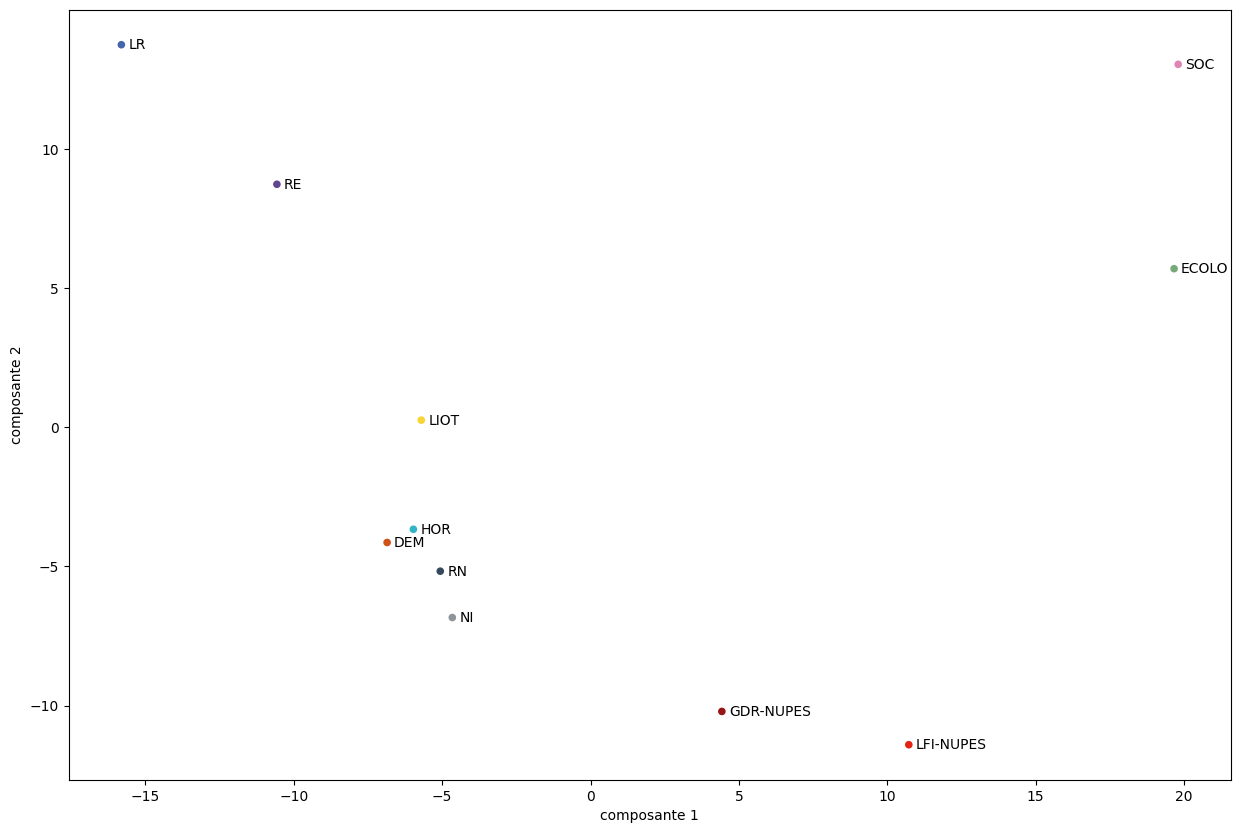

In [44]:
fig, ax = plt.subplots(figsize=(15,10))

(
    amendements_groupes_pca
    .plot
    .scatter(
        x="composante 1",
        y="composante 2",
        c="couleurAssociee",
        ax=ax,
    )
)

for i,g in amendements_groupes_pca.iterrows():
    ax.annotate(g['libelleAbrev'], xy=(g['composante 1'], g['composante 2']), textcoords="offset points", xytext=(5, -3))